In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\SPECTRE\OneDrive\Documentos\house_prices_dataset.csv")


In [6]:
# Display the first few rows of the dataset
print(df.head())

#Exploratory Data Analysis- Descriptive Analysis
print(df.describe())

# Get a summary of the dataset (data types, non-null counts, etc.)
print(df.info())

#Check for Missing Values
print(df.isnull().sum())

  House ID  Location  Size (sq. ft.)  Number of Rooms  Number of Bathrooms  \
0     H001  Suburban             847                2                    1   
1     H002     Urban            3586                2                    2   
2     H003     Urban            3752                4                    1   
3     H004     Urban            1269                2                    1   
4     H005     Rural            3592                6                    2   

   Year Built  Distance to City Center (km)  Nearby Amenities  Price (USD)  
0        2000                          39.5                12       156851  
1        1984                          30.7                 3       781059  
2        1982                          16.8                14       860004  
3        2022                          22.6                 8       366232  
4        1999                          34.1                15       941597  
       Size (sq. ft.)  Number of Rooms  Number of Bathrooms  Year Bui

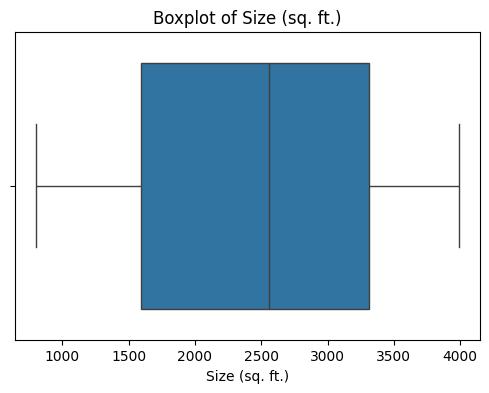

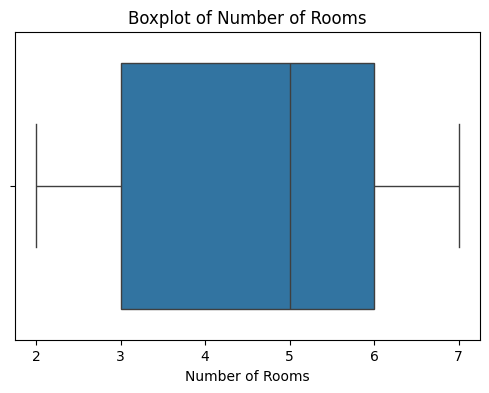

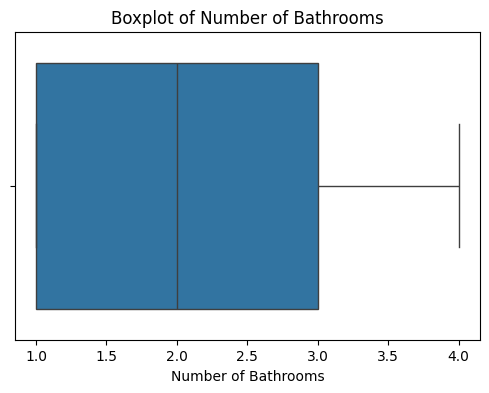

Column 'Distance to City Center' not found in the dataset!


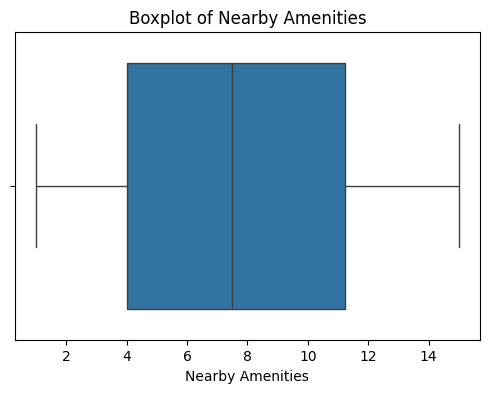

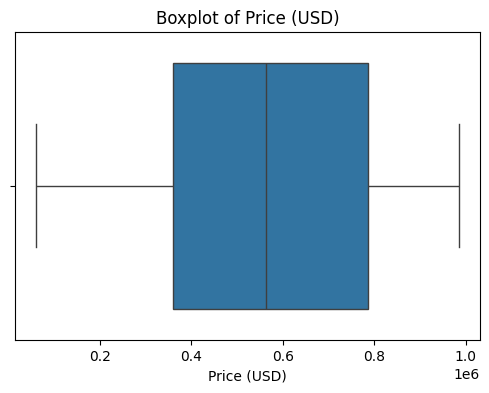

In [7]:
#Identify Outliers- Using boxplots to visualize potential outliers:
# Boxplot for detecting outliers in numerical features
numerical_features = ['Size (sq. ft.)', 'Number of Rooms', 'Number of Bathrooms', 
                      'Distance to City Center', 'Nearby Amenities', 'Price (USD)']
for feature in numerical_features:
    if feature not in df.columns:
        print(f"Column '{feature}' not found in the dataset!")
        continue
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
#Check Data Types
print(df.dtypes)

# Define Numerical Features
# We'll extract numerical features from the dataset
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers using IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)  # 25th percentile
    Q3 = df[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Print the computed IQR, lower bound, and upper bound for the feature
    print(f"\nFeature: {feature}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Print the number of rows before removing outliers
    print("Before Removing Outliers:", len(df))

    # Remove outliers for the current feature
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    # Print the number of rows after removing outliers
    print("After Removing Outliers:", len(df))

# Check the data after removing outliers
print("\nData after outlier removal:")
print(df.head())


House ID                         object
Location                         object
Size (sq. ft.)                    int64
Number of Rooms                   int64
Number of Bathrooms               int64
Year Built                        int64
Distance to City Center (km)    float64
Nearby Amenities                  int64
Price (USD)                       int64
dtype: object

Feature: Size (sq. ft.)
Q1 (25th percentile): 1593.25
Q3 (75th percentile): 3310.75
IQR: 1717.5
Lower Bound: -983.0
Upper Bound: 5887.0
Before Removing Outliers: 100
After Removing Outliers: 100

Feature: Number of Rooms
Q1 (25th percentile): 3.0
Q3 (75th percentile): 6.0
IQR: 3.0
Lower Bound: -1.5
Upper Bound: 10.5
Before Removing Outliers: 100
After Removing Outliers: 100

Feature: Number of Bathrooms
Q1 (25th percentile): 1.0
Q3 (75th percentile): 3.0
IQR: 2.0
Lower Bound: -2.0
Upper Bound: 6.0
Before Removing Outliers: 100
After Removing Outliers: 100

Feature: Year Built
Q1 (25th percentile): 1986.0
Q3 (75th perc

In [7]:
import sklearn
print(sklearn.__version__)


1.6.0


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example: Load the DataFrame
df = pd.read_csv(r"C:\Users\SPECTRE\OneDrive\Documentos\house_prices_dataset.csv")

# Define numerical features (columns that you want to normalize)
numerical_features = [
    'Size (sq. ft.)',
    'Number of Rooms',
    'Number of Bathrooms',
    'Year Built',
    'Distance to City Center (km)',
    'Price (USD)'
]

# Ensure that the column names are stripped of leading/trailing spaces
print("Columns in DataFrame:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing numerical features
missing_features = [feature for feature in numerical_features if feature not in df.columns]
if missing_features:
    print(f"Missing columns in DataFrame: {missing_features}")
else:
    print("All columns are present!")

# Update numerical_features to only include columns that are actually in the DataFrame
numerical_features = [feature for feature in numerical_features if feature in df.columns]

# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the normalized DataFrame
print(df.head())


Columns in DataFrame: Index(['House ID', 'Location', 'Size (sq. ft.)', 'Number of Rooms',
       'Number of Bathrooms', 'Year Built', 'Distance to City Center (km)',
       'Nearby Amenities', 'Price (USD)'],
      dtype='object')
All columns are present!
  House ID  Location  Size (sq. ft.)  Number of Rooms  Number of Bathrooms  \
0     H001  Suburban        0.014120              0.0             0.000000   
1     H002     Urban        0.873549              0.0             0.333333   
2     H003     Urban        0.925635              0.4             0.000000   
3     H004     Urban        0.146533              0.0             0.000000   
4     H005     Rural        0.875431              0.8             0.333333   

   Year Built  Distance to City Center (km)  Nearby Amenities  Price (USD)  
0    0.576923                      0.794492                12     0.104093  
1    0.269231                      0.608051                 3     0.779467  
2    0.230769                      0.313559 

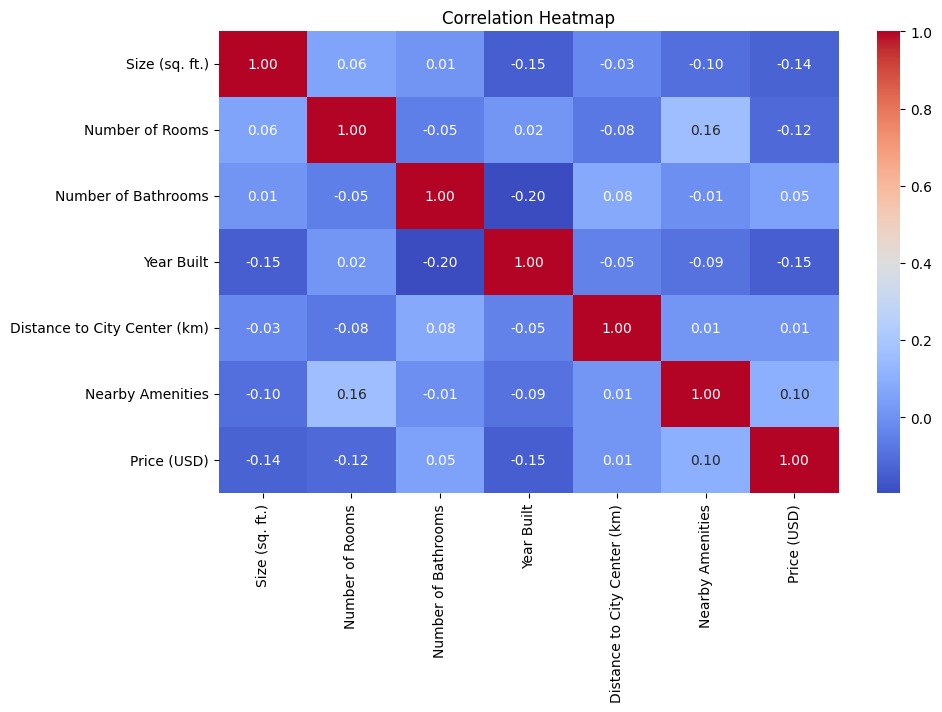

House ID                         object
Location                         object
Size (sq. ft.)                  float64
Number of Rooms                 float64
Number of Bathrooms             float64
Year Built                      float64
Distance to City Center (km)    float64
Nearby Amenities                  int64
Price (USD)                     float64
dtype: object


In [10]:
#data visualization
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print(df.dtypes)

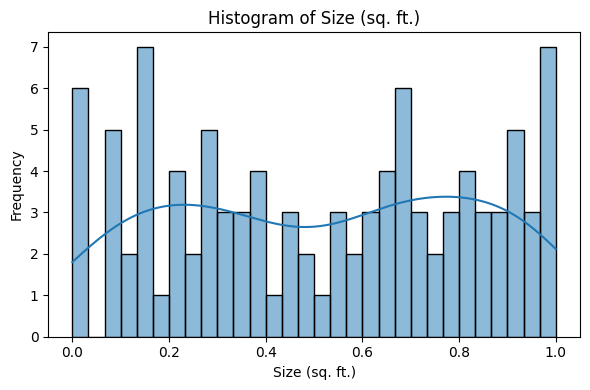

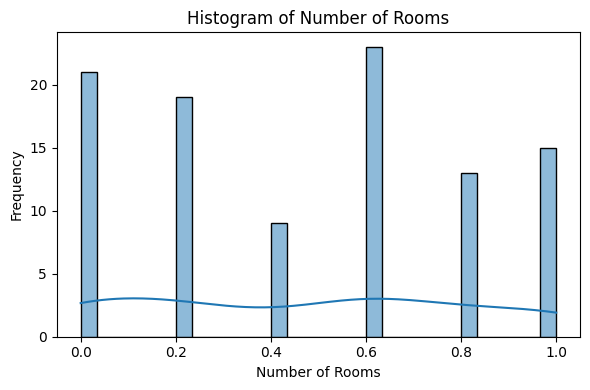

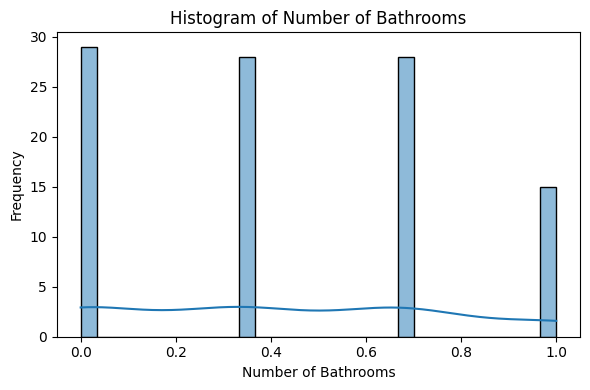

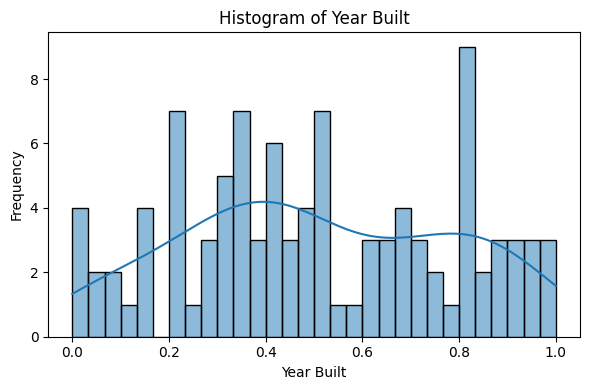

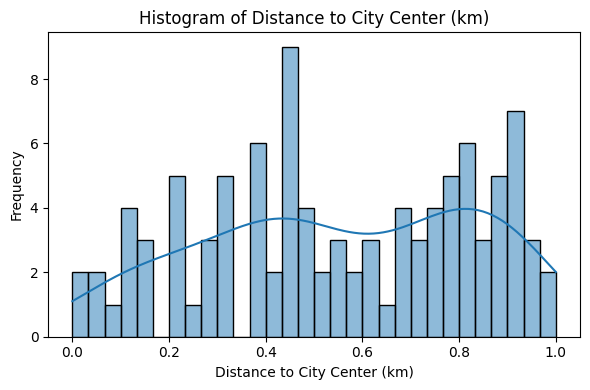

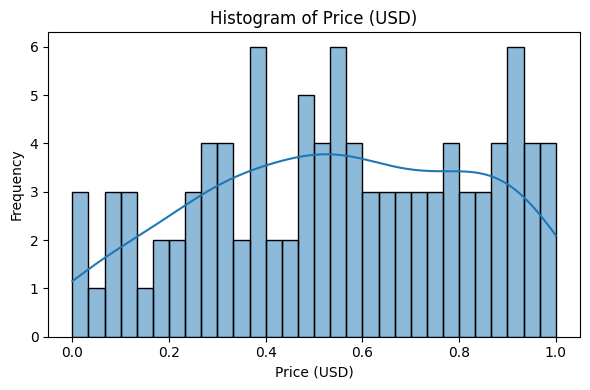

In [11]:
# Data visualisation(histogram representation)
valid_features = [feature for feature in numerical_features if feature in df.columns]

# Check for missing values and fill them to avoid plotting errors
df[valid_features] = df[valid_features].fillna(df[valid_features].mean())

# Plot histograms for each numerical feature
for feature in valid_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Ensure layout fits well
    plt.show()

   Price per SqFt  Age of House  Rooms per Bathroom
0        7.372104   2023.423077                 0.0
1        0.892300   2023.730769                 0.0
2        0.934367   2023.769231                 0.4
3        2.256403   2023.000000                 0.0
4        1.088794   2023.442308                 2.4


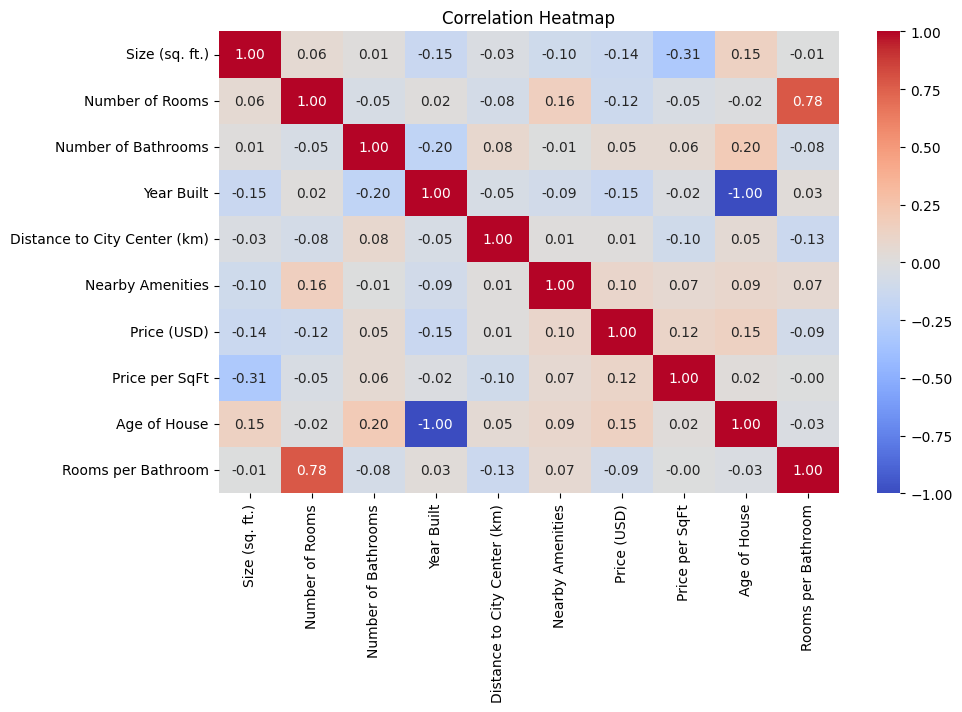

In [12]:
# Create new features
df['Price per SqFt'] = df['Price (USD)'] / df['Size (sq. ft.)']
df['Age of House'] = 2024 - df['Year Built']

# Avoid division by zero for "Rooms per Bathroom"
df['Rooms per Bathroom'] = df['Number of Rooms'] / df['Number of Bathrooms'].replace(0, 1)

# Display the first few rows of the dataset to verify new features
print(df[['Price per SqFt', 'Age of House', 'Rooms per Bathroom']].head())

# Feature selection using correlation anaysis
numeric_df = df.select_dtypes(include=['number'])

# Handle missing values (if any) before correlation analysis
numeric_df = numeric_df.fillna(numeric_df.mean())

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
#Split the Dataset into Training and Test Sets
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop('Price (USD)', axis=1)  # Features
y = df['Price (USD)']               # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
print("Dataset Split Summary:")
print(f"Number of features: {X.shape[1]}")
print(f"X_train shape: {X_train.shape} (Training Features)")
print(f"X_test shape: {X_test.shape} (Testing Features)")
print(f"y_train shape: {y_train.shape} (Training Target)")
print(f"y_test shape: {y_test.shape} (Testing Target)")

# Display a sample of the training data
print("\nSample of Training Features (X_train):")
print(X_train.head())
print("\nSample of Training Target (y_train):")
print(y_train.head())

Dataset Split Summary:
Number of features: 11
X_train shape: (80, 11) (Training Features)
X_test shape: (20, 11) (Testing Features)
y_train shape: (80,) (Training Target)
y_test shape: (20,) (Testing Target)

Sample of Training Features (X_train):
   House ID  Location  Size (sq. ft.)  Number of Rooms  Number of Bathrooms  \
55     H056  Suburban        0.976781              1.0             0.000000   
88     H089     Urban        0.026357              0.8             0.333333   
26     H027     Urban        0.382805              0.6             0.000000   
42     H043     Urban        0.024161              0.8             0.666667   
69     H070     Urban        0.692187              0.0             0.333333   

    Year Built  Distance to City Center (km)  Nearby Amenities  \
55    0.653846                      0.872881                 4   
88    0.903846                      0.904661                11   
26    0.403846                      0.724576                 4   
42    0.73076

In [16]:
#Model building
print("X_train sample:")
print(X_train.head())
print("\nX_train data types:")
print(X_train.dtypes)

print("\ny_train sample:")
print(y_train.head())
print("\ny_train data type:")
print(y_train.dtypes)
X_train = X_train.select_dtypes(include=['number'])
X_train = X_train.fillna(X_train.mean())
y_train = pd.to_numeric(y_train, errors='coerce').fillna(y_train.mean())
if X_train.isnull().sum().any():
    print("Missing values found in X_train!")
    X_train = X_train.fillna(X_train.mean())
if y_train.isnull().sum() > 0:
    print("Missing values found in y_train!")
    y_train = y_train.fillna(y_train.mean())
print(type(X_train))  # Should output <class 'pandas.core.frame.DataFrame'>
print(type(y_train))  # Should output <class 'pandas.core.series.Series'>
y_train = pd.Series(y_train)

X_train sample:
   House ID  Location  Size (sq. ft.)  Number of Rooms  Number of Bathrooms  \
55     H056  Suburban        0.976781              1.0             0.000000   
88     H089     Urban        0.026357              0.8             0.333333   
26     H027     Urban        0.382805              0.6             0.000000   
42     H043     Urban        0.024161              0.8             0.666667   
69     H070     Urban        0.692187              0.0             0.333333   

    Year Built  Distance to City Center (km)  Nearby Amenities  \
55    0.653846                      0.872881                 4   
88    0.903846                      0.904661                11   
26    0.403846                      0.724576                 4   
42    0.730769                      0.116525                12   
69    0.807692                      0.135593                 5   

    Price per SqFt  Age of House  Rooms per Bathroom  
55        0.273351   2023.346154                 1.0  
88

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is already loaded
# Step 1: Drop non-numeric columns (e.g., 'House ID', 'Location') to avoid issues during model training
df_cleaned = df.drop(columns=['House ID', 'Location'])  # Adjust columns as needed

# Step 2: Select only numeric columns
X = df_cleaned.drop('Price (USD)', axis=1)  # Drop the target variable
X = X.select_dtypes(include=[np.number])  # Only keep numeric columns

# Fill missing values in the features
X = X.fillna(X.mean())

# Step 3: Handle target variable 'Price (USD)'
y = pd.to_numeric(df['Price (USD)'], errors='coerce')  # Convert to numeric, handle errors
y = y.fillna(y.mean())  # Fill missing values with the mean

# Check for infinite values in X_train
print(X.isin([np.inf, -np.inf]).sum())  # Count of inf values in each column
print(X.isnull().sum())  # Check for NaN values

# Replace infinities with NaN and fill them with the column mean
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Step 4: Check for extremely large values (optional)
print(X.describe())  # Check for very large or small values
X = X.clip(-1e6, 1e6)  # Clip values to a reasonable range if needed

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no missing values in the training data
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Display sample data from X_train and y_train
print("\nSample of X_train:")
print(X_train.head())
print("\nSample of y_train:")
print(y_train.head())


Size (sq. ft.)                  0
Number of Rooms                 0
Number of Bathrooms             0
Year Built                      0
Distance to City Center (km)    0
Nearby Amenities                0
Price per SqFt                  1
Age of House                    0
Rooms per Bathroom              0
dtype: int64
Size (sq. ft.)                  0
Number of Rooms                 0
Number of Bathrooms             0
Year Built                      0
Distance to City Center (km)    0
Nearby Amenities                0
Price per SqFt                  0
Age of House                    0
Rooms per Bathroom              0
dtype: int64
       Size (sq. ft.)  Number of Rooms  Number of Bathrooms  Year Built  \
count      100.000000       100.000000           100.000000  100.000000   
mean         0.516106         0.466000             0.430000    0.505577   
std          0.311972         0.349378             0.349105    0.277112   
min          0.000000         0.000000             0.000000   

In [21]:
# Display results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

#code for model evaluation
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
y_pred = model.predict(X_test)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): -0.10


In [22]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")




Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): -0.10
